# Fraud Analysis Using ML Algorithms & customer segmentation

## Problem Statement: 
In this capstone project, you are going to analyze customer’s purchase data set and 
build a machine learning algorithm to detect fraud purchases. 
And also you are going to perform customer segmentation

### Step 1 : Import the required Libraries and data into Pandas DataFrame

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RandomizedSearchCV, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import metrics 

In [2]:
# pd.set_option('display.max_colwidth',None)
pfd = pd.read_csv("Purchase_Fraud_data.csv")
pfd.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,ip_address,class,category,dob
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,65278,QVPSPJUOCKZAR,SEO,Chrome,M,7.327584e+08,0,home_essentials,22-2-1976
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,96399,EOGFQPIZPYXFZ,Ads,Chrome,F,3.503114e+08,0,apparels,2-1-1962
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,57296,YSSKYOSJHPPLJ,SEO,Opera,M,2.621474e+09,1,electronics,5-3-1962
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,43650,ATGTXKYKUDUQN,SEO,Safari,M,3.840542e+09,0,health_care,3-7-1974
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,45016,NAUITBZFJKHWW,Ads,Safari,M,4.155831e+08,0,home_essentials,25-8-1970


### Step 2 : Exploratory Data Analysis

In [3]:
pfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             146185 non-null  object 
 8   ip_address      151112 non-null  float64
 9   class           151112 non-null  int64  
 10  category        151112 non-null  object 
 11  dob             146188 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 13.8+ MB


In [4]:
pfd[['sex','dob']].isnull().sum()

sex    4927
dob    4924
dtype: int64

In [5]:
# Missing Values for sex and dob are 3.37% and 3.26% respectively
(pfd[['sex', 'dob']].isnull().sum()/pfd[['sex', 'dob']].count())*100

sex    3.370387
dob    3.368266
dtype: float64

#### Step 2.1 : Distribution of Class (1:Fraud Transaction, 0: Regular Transaction)

<AxesSubplot:title={'center':'Distribution of Class'}, ylabel='class'>

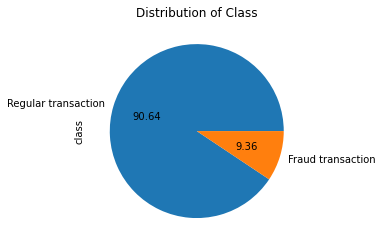

In [6]:
pfd['class'].value_counts(normalize = True).plot(kind='pie',
                                          autopct = '%.2f',
                                          labels = ['Regular transaction','Fraud transaction'],
                                          title = 'Distribution of Class')

#### Step 2.2 : Crosstabulation of 'sex' with Target variable - 'class'

In [7]:
gender_group = pd.crosstab(index = pfd['sex'], columns = pfd['class'], normalize="columns")
gender_group

class,0,1
sex,,
F,0.416726,0.403638
M,0.583274,0.596362


<Figure size 1008x360 with 0 Axes>

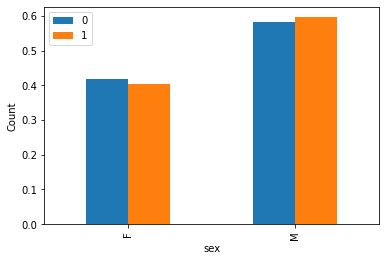

In [8]:
plt.figure(figsize=(14,5))
gender_group.plot.bar()
plt.ylabel("Count")
plt.legend()

#### Step 2.3 : Crosstabulation of 'source' with Target variable - 'class'

In [9]:
source_group = pd.crosstab(index = pfd['source'], columns = pfd['class'], normalize = 'columns')
source_group

class,0,1
source,,
Ads,0.396960,0.389584
Direct,0.199984,0.227970
SEO,0.403056,0.382446


<function matplotlib.pyplot.legend(*args, **kwargs)>

<Figure size 1008x360 with 0 Axes>

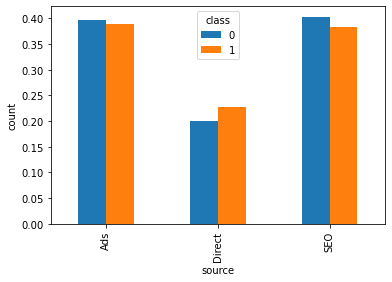

In [10]:
plt.figure(figsize=(14,5))
source_group.plot.bar()
plt.ylabel('count')
plt.legend

#### Step 2.4 : Crosstabulation of 'browser' with Target variable - 'class'

In [11]:
browser_group = pd.crosstab(index = pfd['browser'], columns = pfd['class'], normalize = 'columns')
browser_group

class,0,1
browser,,
Chrome,0.404225,0.428874
FireFox,0.162586,0.165501
IE,0.244887,0.225214
Opera,0.024445,0.023179
Safari,0.163857,0.157233


<function matplotlib.pyplot.legend(*args, **kwargs)>

<Figure size 1008x360 with 0 Axes>

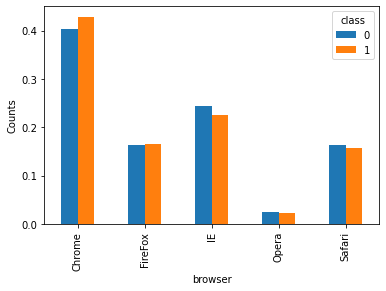

In [12]:
plt.figure(figsize = (14,5))
browser_group.plot.bar()
plt.ylabel('Counts')
plt.legend

#### Step 2.6 : Crosstabulation of "sex, source and browser" with "Class"

<AxesSubplot:xlabel='sex,source,browser'>

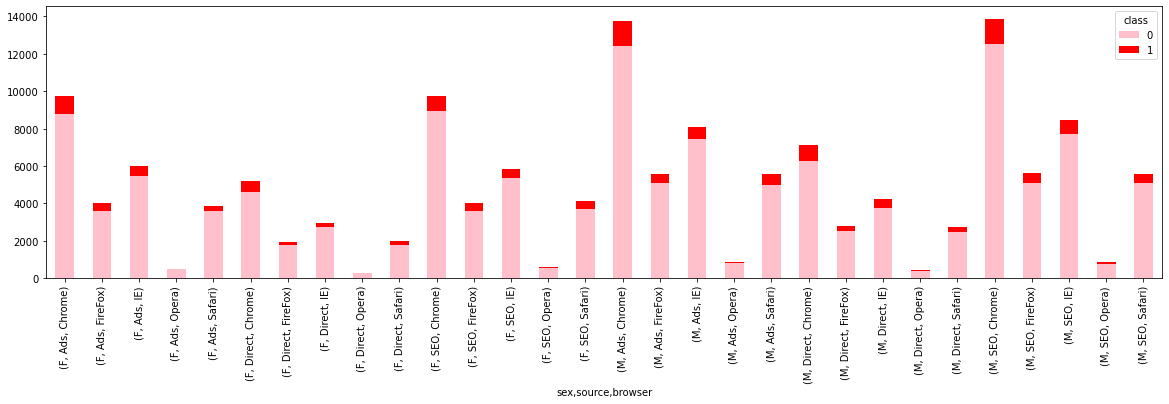

In [13]:
gender_source_browser_group = pd.crosstab(index = [pfd["sex"], pfd["source"], pfd["browser"]], columns = pfd["class"])
gender_source_browser_group.plot(kind='bar', stacked=True, color=['pink','red'], grid=False, figsize=(20, 5))

#### Step 2.7 : Descriptive Statistics continuous variable "Purchase Value"

In [14]:
pfd['purchase_value'].describe()

count    151112.000000
mean      50521.469003
std       28533.667117
min        1016.000000
25%       25919.000000
50%       50484.000000
75%       75296.250000
max      100092.000000
Name: purchase_value, dtype: float64

#### Step 2.8 : Crosstabulation of Gender and Class with Descriptive Statistics of "Purchase Value"

In [15]:
table = pd.pivot_table(pfd, index =['category','class'], values = ['purchase_value'], aggfunc = ['count','min','max','mean','std'])
table

count            min            max  \
                      purchase_value purchase_value purchase_value   
category        class                                                
apparels        0              27390           1035         100056   
                1               2380           1068         100022   
cosmetics       0              27539           1035         100054   
                1               2401           1072         100027   
electronics     0              27451           1044         100050   
                1               4605           1119         100037   
health_care     0              27253           1032         100057   
                1               2436           1053         100041   
home_essentials 0              27328           1016         100092   
                1               2329           1076          99952   

                                mean            std  
                      purchase_value purchase_value  
category        class                                
apparels        0       50298.911829   28439.049928  
                1       50989.498739   28538.931647  
cosmetics       0       50768.458913   28566.244287  
                1       50040.231154   29041.660123  
electronics     0       50479.898328   28441.308871  
                1       51242.677959   28505.981789  
health_care     0       50587.314241   28610.911626  
                1       50522.050903   28463.383830  
home_essentials 0       50307.411922   28584.845460  
                1       51040.735079   28424.876924

In [16]:
table = pd.pivot_table(pfd, index =['class'], values = ['purchase_value'], aggfunc = ['count','min','max','mean','std'])
table

,count,min,max,mean,std
,purchase_value,purchase_value,purchase_value,purchase_value,purchase_value
class,,,,,
0,136961,1016,100092,50488.682924,28528.595464
1,14151,1053,100041,50838.790333,28581.772862


<AxesSubplot:ylabel='Density'>

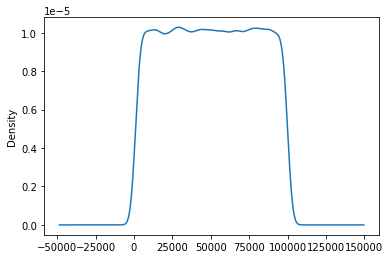

In [17]:
pfd['purchase_value'].plot.kde()

### Step 3 : Data Preprocessing and Feature Engineering

#### Step 3.1 Data Preprocessing

##### 3.1.a : Transformation of Data Types ( signup_time, purchase_time and dob)

In [18]:
pfd['signup_time'] = pd.to_datetime(pfd['signup_time'])
pfd['purchase_time'] = pd.to_datetime(pfd['purchase_time'])
pfd['dob'] = pd.to_datetime(pfd['dob'] )
pfd[['signup_time', 'purchase_time', 'dob']].dtypes

signup_time      datetime64[ns]
purchase_time    datetime64[ns]
dob              datetime64[ns]
dtype: object

In [19]:
pfd.head(2)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,ip_address,class,category,dob
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,65278,QVPSPJUOCKZAR,SEO,Chrome,M,7.327584e+08,0,home_essentials,1976-02-22
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,96399,EOGFQPIZPYXFZ,Ads,Chrome,F,3.503114e+08,0,apparels,1962-02-01


##### 3.1.b Missing Value Treatment (Drop OR Imputation of missing values for 'sex' & 'dob')

In [20]:
# Deleting the row with missing data
df = pfd.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141404 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         141404 non-null  int64         
 1   signup_time     141404 non-null  datetime64[ns]
 2   purchase_time   141404 non-null  datetime64[ns]
 3   purchase_value  141404 non-null  int64         
 4   device_id       141404 non-null  object        
 5   source          141404 non-null  object        
 6   browser         141404 non-null  object        
 7   sex             141404 non-null  object        
 8   ip_address      141404 non-null  float64       
 9   class           141404 non-null  int64         
 10  category        141404 non-null  object        
 11  dob             141404 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(5)
memory usage: 14.0+ MB


Here, by deleting the missing-value-data will reduce the sample size by 6.4%

##### 3.1 c) Outlier Detection and Treatment ('purchase_value')

<AxesSubplot:>

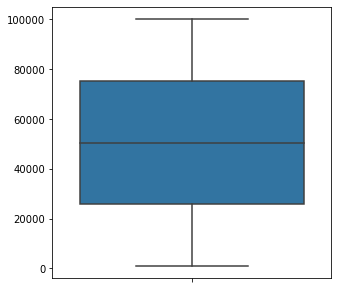

In [21]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df,y=df.purchase_value.values)

##### 3.1.d Imbalanced data : 
For an imbalanced class dataset F1 score is a more appropriate metric

#### 3.2 Feature Engineering:

##### 3.2.a DatePart and TimePart extraction from signup_time

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
df['signup_datepart'] = df['signup_time'].dt.date
df['signup_timepart'] = df['signup_time'].dt.time
df[['signup_time', 'signup_datepart', 'signup_timepart']] .head()

,signup_time,signup_datepart,signup_timepart
0,2015-02-24 22:55:49,2015-02-24,22:55:49
1,2015-06-07 20:39:50,2015-06-07,20:39:50
2,2015-01-01 18:52:44,2015-01-01,18:52:44
3,2015-04-28 21:13:25,2015-04-28,21:13:25
4,2015-07-21 07:09:52,2015-07-21,07:09:52


##### 3.2.b DatePart and TimePart extraction from purchase_time

In [24]:
df['purchase_datepart'] = df['purchase_time'].dt.date
df['purchase_timepart'] = df['purchase_time'].dt.time
df[['purchase_time', 'purchase_datepart', 'purchase_timepart']] .head()

,purchase_time,purchase_datepart,purchase_timepart
0,2015-04-18 02:47:11,2015-04-18,02:47:11
1,2015-06-08 01:38:54,2015-06-08,01:38:54
2,2015-01-01 18:52:45,2015-01-01,18:52:45
3,2015-05-04 13:54:50,2015-05-04,13:54:50
4,2015-09-09 18:40:53,2015-09-09,18:40:53


##### 3.2.c Difference between purchase_date and singup_date 

In [25]:
# df['age'] = today.year - df['dob'].dt.year
df['singup_purchase_date_difference'] = (df['purchase_datepart'] - df['signup_datepart']).astype('str')
df['singup_purchase_date_difference'] = df['singup_purchase_date_difference'].str.split(' ',expand=True)[0]
df[['signup_datepart','purchase_datepart','singup_purchase_date_difference','class']].head()

,signup_datepart,purchase_datepart,singup_purchase_date_difference,class
0,2015-02-24,2015-04-18,53,0
1,2015-06-07,2015-06-08,1,0
2,2015-01-01,2015-01-01,0,1
3,2015-04-28,2015-05-04,6,0
4,2015-07-21,2015-09-09,50,0


##### 3.2.d Difference between purchase_time and singup_time

In [26]:
df['singup_purchase_time_difference'] = df['purchase_time'] - df['signup_time']
df['singup_purchase_time_difference']=df['singup_purchase_time_difference']/np.timedelta64(1,'h')
df[['purchase_time', 'signup_time', 'singup_purchase_time_difference','class']].head()

,purchase_time,signup_time,singup_purchase_time_difference,class
0,2015-04-18 02:47:11,2015-02-24 22:55:49,1251.856111,0
1,2015-06-08 01:38:54,2015-06-07 20:39:50,4.984444,0
2,2015-01-01 18:52:45,2015-01-01 18:52:44,0.000278,1
3,2015-05-04 13:54:50,2015-04-28 21:13:25,136.690278,0
4,2015-09-09 18:40:53,2015-07-21 07:09:52,1211.516944,0


##### 3.2.e Age from DOB

In [27]:
today = pd.to_datetime('today')
df['age'] = today.year - df['dob'].dt.year
df[['dob', 'age']].head(2)

,dob,age
0,1976-02-22,47
1,1962-02-01,61


##### 3.2.f IP Address Conversion (Extrat some significance as per the target variable)

In [28]:
df['ip_new'] = df['ip_address'].apply(np.int64)
df[['ip_address', 'ip_new']].head()

,ip_address,ip_new
0,7.327584e+08,732758368
1,3.503114e+08,350311387
2,2.621474e+09,2621473820
3,3.840542e+09,3840542443
4,4.155831e+08,415583117


In [29]:
# importing the module
import ipaddress

In [30]:
# define a function to convert integer to IP address
def int_to_ip(int_ip):
    try:
        return str(ipaddress.ip_address(int_ip))
    except:
        return None   

In [31]:
# apply the function to the dataframe
df['ip_new'] = df['ip_new'].apply(int_to_ip)
df[["ip_address","ip_new"]].head(2)

,ip_address,ip_new
0,7.327584e+08,43.173.1.96
1,3.503114e+08,20.225.83.219


##### 3.2.g One-Hot-Encoding for Discreate Variables (Nominal/Ordinal)

##### The difference between singup & purchase date <  0, seems to be a significant new variable

In [32]:
df['singup_purchase_date_difference_dummy'] = df['singup_purchase_date_difference'].apply(lambda x: 1 if x == '0'else 0)
df.singup_purchase_date_difference_dummy.value_counts()

0    133172
1      8232
Name: singup_purchase_date_difference_dummy, dtype: int64

In [33]:
singup_purchase_date_difference_dummy_group = pd.crosstab(index = df['singup_purchase_date_difference_dummy'], 
                                                          columns = df['class'], normalize='columns')
singup_purchase_date_difference_dummy_group

class,0,1
singup_purchase_date_difference_dummy,,
0,0.995841,0.418505
1,0.004159,0.581495


<function matplotlib.pyplot.legend(*args, **kwargs)>

<Figure size 1008x360 with 0 Axes>

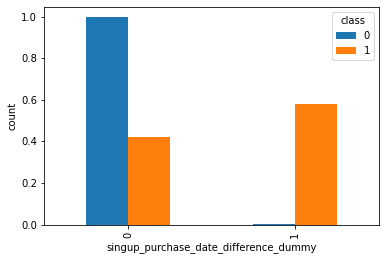

In [34]:
plt.figure(figsize=(14,5))
singup_purchase_date_difference_dummy_group.plot.bar()
plt.ylabel('count')
plt.legend

##### The difference between singup & purchase time < 1hour, seems to be a significant new variable

In [35]:
df['singup_purchase_time_difference_dummy'] = df['singup_purchase_time_difference'].apply(lambda x: 1 if x <= 1 else 0)
df.singup_purchase_date_difference_dummy.value_counts()

0    133172
1      8232
Name: singup_purchase_date_difference_dummy, dtype: int64

In [36]:
singup_purchase_time_difference_dummy_group = pd.crosstab(index = df['singup_purchase_time_difference_dummy'], 
                                                          columns = df['class'], normalize='index')
singup_purchase_time_difference_dummy_group

class,0,1
singup_purchase_time_difference_dummy,,
0,0.941115,0.058885
1,0.006468,0.993532


<function matplotlib.pyplot.legend(*args, **kwargs)>

<Figure size 1008x360 with 0 Axes>

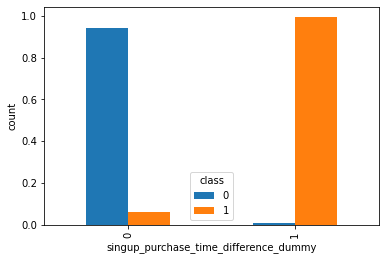

In [37]:
plt.figure(figsize=(14,5))
singup_purchase_time_difference_dummy_group.plot.bar()
plt.ylabel('count')
plt.legend

##### Create a new categorical variable from a continous('age') variable

In [38]:
df.age.describe()

count    141404.000000
mean         41.871871
std           9.595026
min          26.000000
25%          35.000000
50%          41.000000
75%          48.000000
max          84.000000
Name: age, dtype: float64

In [39]:
def fun(x):
    if x <= 30:
        x = 'Below 30'
    elif x <= 35:
        x = 'Between 31 & 35'
    elif x <= 40:
        x = 'Between 36 & 40'
    elif x <= 50:
        x = 'Between 41 & 50'
    else:
        x = 'Above 50'
    return x

In [40]:
df['age_category'] = df['age'].apply(fun)
df[["age", "age_category"]].head()
df.age_category.value_counts()

Between 41 & 50    48867
Between 36 & 40    29252
Above 50           24065
Between 31 & 35    23826
Below 30           15394
Name: age_category, dtype: int64

In [41]:
age_category_group = pd.crosstab(index = df['age_category'], columns = df['class'],
                                normalize = 'columns')
age_category_group

class,0,1
age_category,,
Above 50,0.146336,0.401057
Below 30,0.112286,0.075755
Between 31 & 35,0.174245,0.112840
Between 36 & 40,0.212891,0.148565
Between 41 & 50,0.354241,0.261782


<function matplotlib.pyplot.legend(*args, **kwargs)>

<Figure size 1008x360 with 0 Axes>

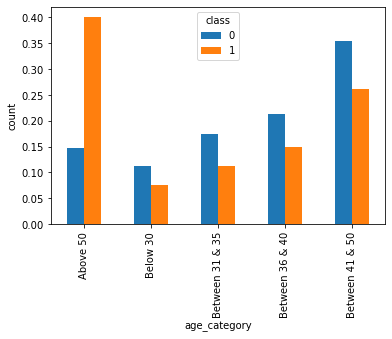

In [42]:
plt.figure(figsize=(14,5))
age_category_group.plot.bar()
plt.ylabel('count')
plt.legend

In [43]:
#source, browser, sex, category, age_category_group
pd_data_dum_drop = pd.get_dummies(df, columns=['source','browser','sex', 'category'], drop_first=True)
pd_data_dum_drop = pd.get_dummies(pd_data_dum_drop, columns=['age_category'], drop_first=False)
pd_data_dum_drop.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,ip_address,class,dob,signup_datepart,signup_timepart,...,sex_M,category_cosmetics,category_electronics,category_health_care,category_home_essentials,age_category_Above 50,age_category_Below 30,age_category_Between 31 & 35,age_category_Between 36 & 40,age_category_Between 41 & 50
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,65278,QVPSPJUOCKZAR,7.327584e+08,0,1976-02-22,2015-02-24,22:55:49,...,1,0,0,0,1,0,0,0,0,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,96399,EOGFQPIZPYXFZ,3.503114e+08,0,1962-02-01,2015-06-07,20:39:50,...,0,0,0,0,0,1,0,0,0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,57296,YSSKYOSJHPPLJ,2.621474e+09,1,1962-05-03,2015-01-01,18:52:44,...,1,0,1,0,0,1,0,0,0,0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,43650,ATGTXKYKUDUQN,3.840542e+09,0,1974-03-07,2015-04-28,21:13:25,...,1,0,0,1,0,0,0,0,0,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,45016,NAUITBZFJKHWW,4.155831e+08,0,1970-08-25,2015-07-21,07:09:52,...,1,0,0,0,1,1,0,0,0,0


In [44]:
# Using SKlearn & StandardScalar.
scaler = StandardScaler()
pd_data_dum_drop.iloc[:,3:4]=scaler.fit_transform(pd_data_dum_drop.iloc[:,3:4].to_numpy())
pd_data_dum_drop.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,ip_address,class,dob,signup_datepart,signup_timepart,...,sex_M,category_cosmetics,category_electronics,category_health_care,category_home_essentials,age_category_Above 50,age_category_Below 30,age_category_Between 31 & 35,age_category_Between 36 & 40,age_category_Between 41 & 50
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,0.517819,QVPSPJUOCKZAR,7.327584e+08,0,1976-02-22,2015-02-24,22:55:49,...,1,0,0,0,1,0,0,0,0,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,1.608423,EOGFQPIZPYXFZ,3.503114e+08,0,1962-02-01,2015-06-07,20:39:50,...,0,0,0,0,0,1,0,0,0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,0.238097,YSSKYOSJHPPLJ,2.621474e+09,1,1962-05-03,2015-01-01,18:52:44,...,1,0,1,0,0,1,0,0,0,0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,-0.240113,ATGTXKYKUDUQN,3.840542e+09,0,1974-03-07,2015-04-28,21:13:25,...,1,0,0,1,0,0,0,0,0,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,-0.192243,NAUITBZFJKHWW,4.155831e+08,0,1970-08-25,2015-07-21,07:09:52,...,1,0,0,0,1,1,0,0,0,0


In [45]:
pd_data_dum_drop.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'ip_address', 'class', 'dob', 'signup_datepart',
       'signup_timepart', 'purchase_datepart', 'purchase_timepart',
       'singup_purchase_date_difference', 'singup_purchase_time_difference',
       'age', 'ip_new', 'singup_purchase_date_difference_dummy',
       'singup_purchase_time_difference_dummy', 'source_Direct', 'source_SEO',
       'browser_FireFox', 'browser_IE', 'browser_Opera', 'browser_Safari',
       'sex_M', 'category_cosmetics', 'category_electronics',
       'category_health_care', 'category_home_essentials',
       'age_category_Above 50', 'age_category_Below 30',
       'age_category_Between 31 & 35', 'age_category_Between 36 & 40',
       'age_category_Between 41 & 50'],
      dtype='object')

In [46]:
final_data_prepared = pd_data_dum_drop[['class', 'singup_purchase_time_difference_dummy', 
                                        'singup_purchase_date_difference_dummy', 
                                        'source_Direct', 'source_SEO','browser_FireFox', 'browser_IE',
                                        'browser_Opera', 'browser_Safari', 'sex_M', 'category_cosmetics', 
                                        'category_electronics', 'category_health_care','category_home_essentials', 
                                        'age_category_Below 30','age_category_Between 31 & 35', 
                                        'age_category_Between 36 & 40', 'age_category_Between 41 & 50',
                                        'age_category_Above 50']]
final_data_prepared.head()

,class,singup_purchase_time_difference_dummy,singup_purchase_date_difference_dummy,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M,category_cosmetics,category_electronics,category_health_care,category_home_essentials,age_category_Below 30,age_category_Between 31 & 35,age_category_Between 36 & 40,age_category_Between 41 & 50,age_category_Above 50
0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1


### Step 4: Feature Selection 

In [47]:
final_data_prepared[final_data_prepared.columns[:]].corr()['class'][:]

class                                    1.000000
singup_purchase_time_difference_dummy    0.607007
singup_purchase_date_difference_dummy    0.718285
source_Direct                            0.020694
source_SEO                              -0.011041
browser_FireFox                          0.001863
browser_IE                              -0.012923
browser_Opera                           -0.003210
browser_Safari                          -0.005384
sex_M                                    0.008160
category_cosmetics                      -0.022277
category_electronics                     0.089073
category_health_care                    -0.020089
category_home_essentials                -0.026115
age_category_Below 30                   -0.034167
age_category_Between 31 & 35            -0.047791
age_category_Between 36 & 40            -0.046263
age_category_Between 41 & 50            -0.056638
age_category_Above 50                    0.197460
Name: class, dtype: float64

<AxesSubplot:>

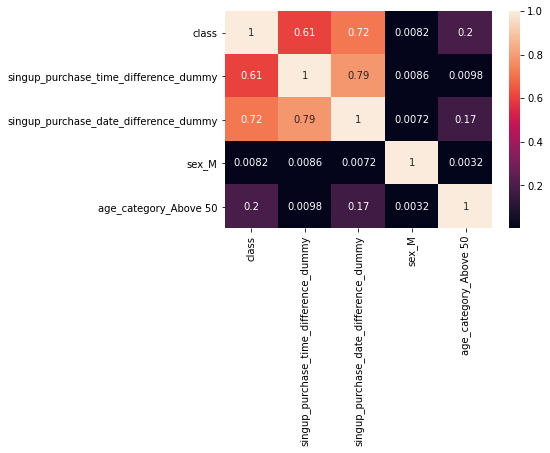

In [48]:
# Numeric columns of the dataset
key_col = ['class', 'singup_purchase_time_difference_dummy', 
                                        'singup_purchase_date_difference_dummy', 
                                        'sex_M', 
                                        'age_category_Above 50']
 
# Correlation Matrix formation
corr_matrix = final_data_prepared.loc[:,key_col].corr()
# print(corr_matrix)
 
#Using heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True)

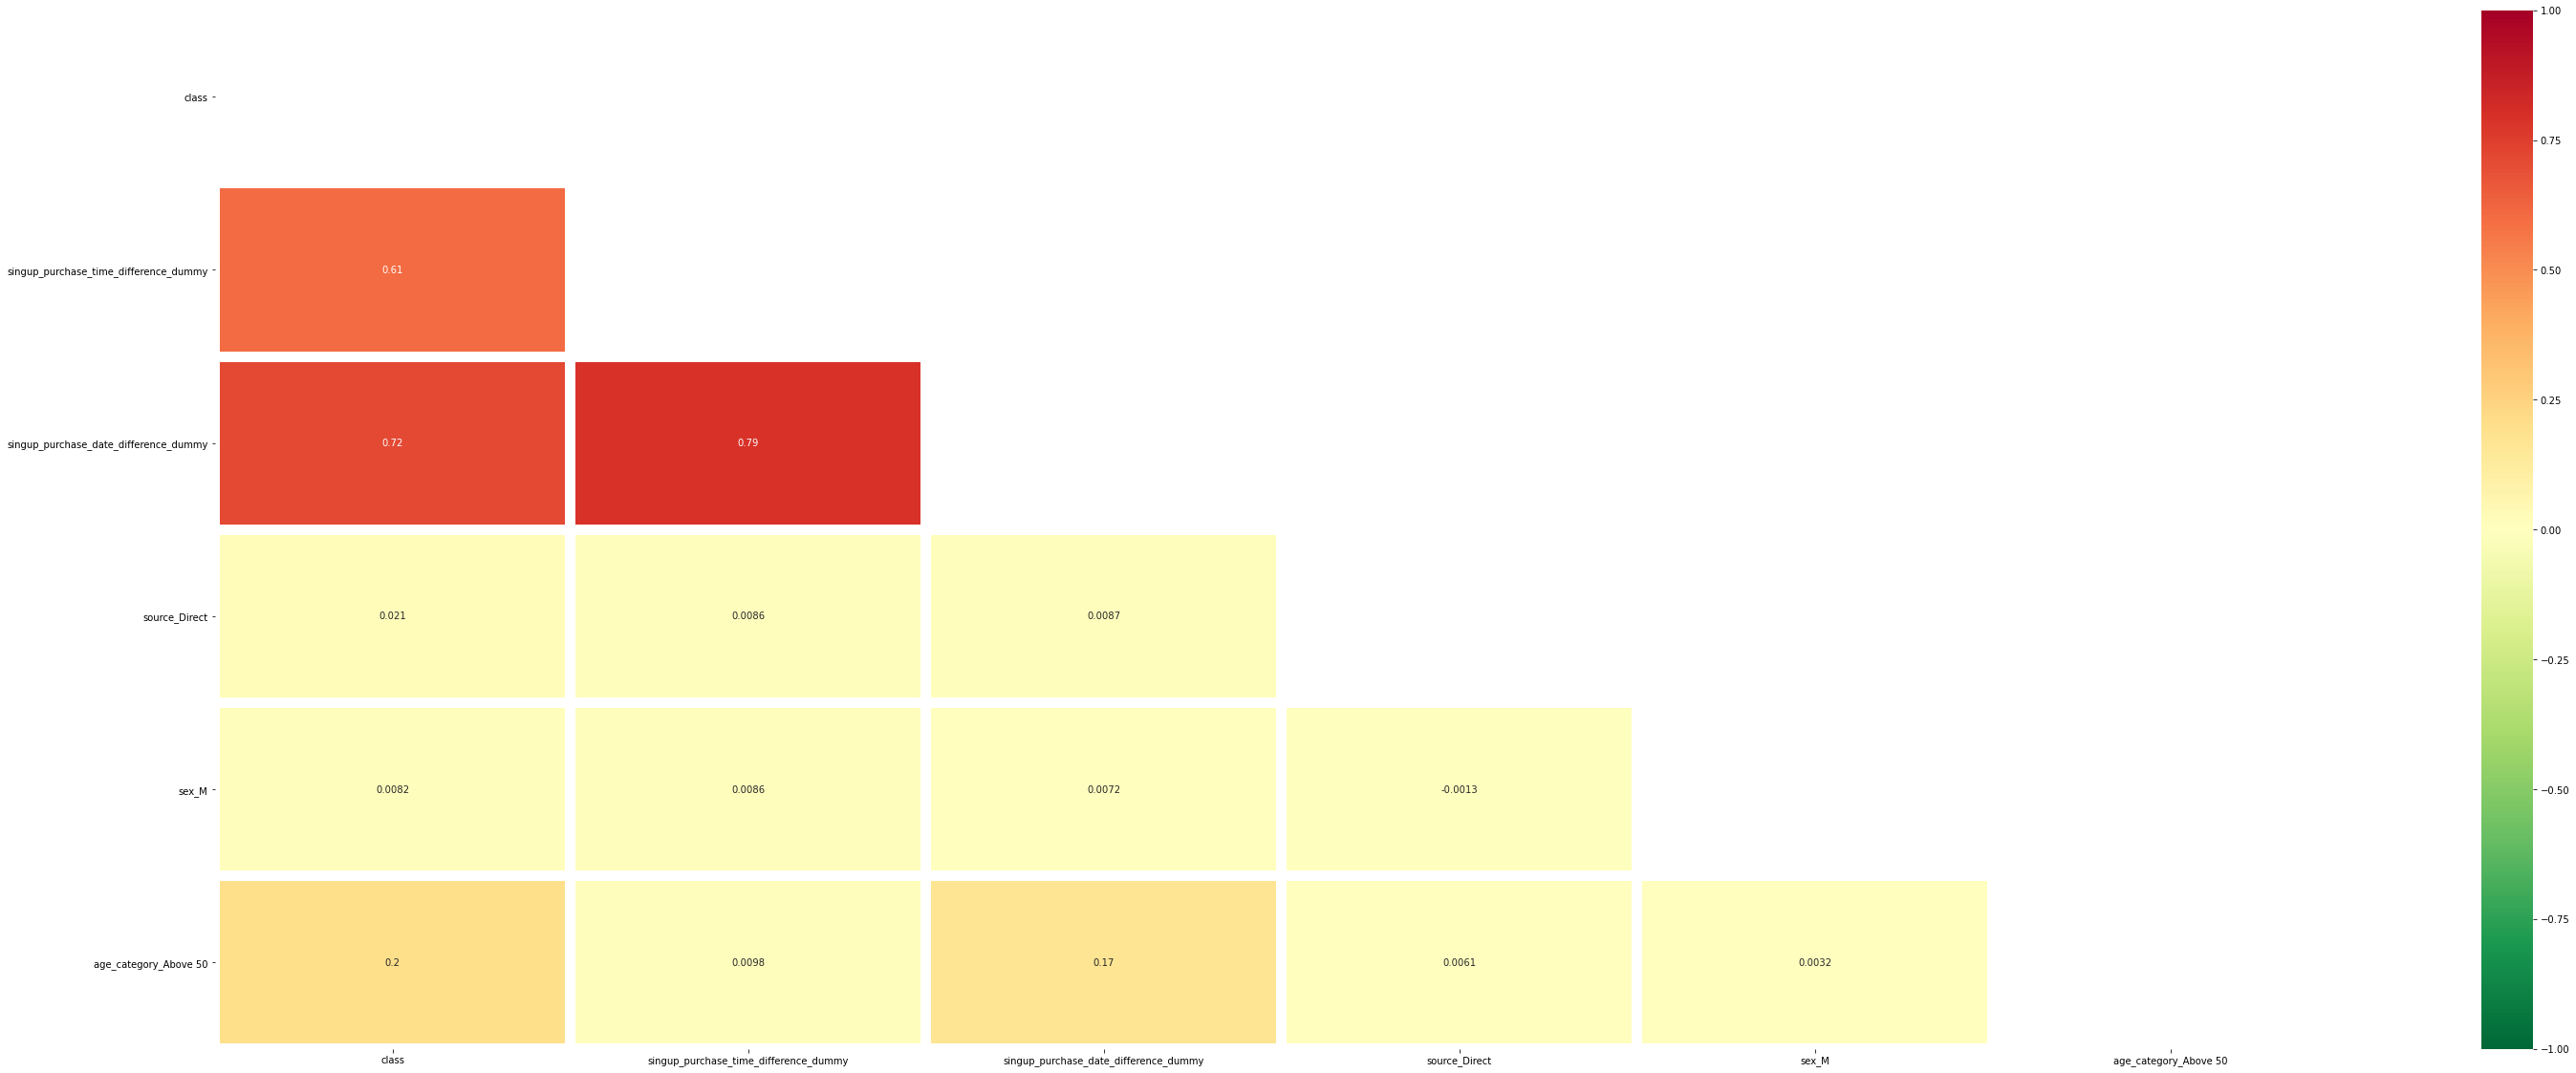

In [49]:
sample = final_data_prepared [['class','singup_purchase_time_difference_dummy','singup_purchase_date_difference_dummy',
                               'source_Direct', 'sex_M', 'age_category_Above 50']]
# set figure size
plt.figure(figsize=(50,20))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(sample.corr(), dtype=bool))

# generate heatmap
#sns.heatmap(X.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
sns.heatmap(sample.corr(), cmap = 'RdYlGn_r', annot=True, vmax = 1.0, vmin = -1.0, mask=mask,linewidths=10)
#plt.yticks(rotation=0)
#plt.xticks(rotation=90)
plt.savefig('Correlation Coefficient Of Predictors_sample.png')

### Step 5: Model Building and Evaluation

In [50]:
# create dependent and independent feature sets
X = final_data_prepared.drop(columns='class').copy()
y = final_data_prepared['class'].copy()
X.shape

(141404, 18)

In [51]:
# spilt the data set in training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 77)

##### Step 5.1: Model Bulding "Logistic Regression"

In [52]:
# fit the logistic regression model using sklearn
logr = LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
# predict the values for train set using the trained model
y_pred_train = logr.predict(X_train)
print("Accuracy Score on Trained Data :", accuracy_score(y_train, y_pred_train),"\n",
     "F1_Score Score on Trained Data :", f1_score(y_train, y_pred_train),"\n",
     "Precision Score on Trained Data :", precision_score(y_train, y_pred_train), "\n",
      "Recall Score on Trained Data :", recall_score(y_train, y_pred_train), "\n",
      "Confusion Matrix on Trained Data :","\n", confusion_matrix(y_train, y_pred_train))

Accuracy Score on Trained Data : 0.9568894797884077 
 F1_Score Score on Trained Data : 0.719440353460972 
 Precision Score on Trained Data : 0.9356743814844374 
 Recall Score on Trained Data : 0.5843883959724853 
 Confusion Matrix on Trained Data : 
 [[95619   403]
 [ 4169  5862]]


In [54]:
y_pred_test = logr.predict(X_test)

# calculate the accuracy score
print("Accuracy Score on Test Data :", accuracy_score(y_test, y_pred_test),"\n",
     "F1_Score Score on Test Data :", f1_score(y_test, y_pred_test),"\n",
     "Precision Score on Test Data :", precision_score(y_test, y_pred_test), "\n",
     "Recall Score on Test Data :", recall_score(y_test, y_pred_test), "\n",
      "Confusion Matrix on Test Data :","\n", confusion_matrix(y_test, y_pred_test))

Accuracy Score on Test Data : 0.9576815365901955 
 F1_Score Score on Test Data : 0.7114197530864198 
 Precision Score on Test Data : 0.9336708860759494 
 Recall Score on Test Data : 0.5746338423184792 
 Confusion Matrix on Test Data : 
 [[32011   131]
 [ 1365  1844]]


##### Step 5.2: Model Bulding "Support Vector Machine"

In [55]:
from sklearn import  svm
clf = svm.SVC()

In [56]:
clf.fit(X_train, y_train) 
#draw an hyper plane to clearly seggregate the data, 
# if required, it applies a transformation so that the data points are linearly seperable

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
# predict the values for train set using the trained model
y_pred_train = clf.predict(X_train)
print("Accuracy Score on Trained Data :", accuracy_score(y_train, y_pred_train),"\n",
      "F1_Score Score on Trained Data :", f1_score(y_train, y_pred_train),"\n",
      "Precision Score on Trained Data :", precision_score(y_train, y_pred_train), "\n",
      "Recall Score on Trained Data :", recall_score(y_train, y_pred_train))                                                         

Accuracy Score on Trained Data : 0.9597842588139892 
 F1_Score Score on Trained Data : 0.7328196454300571 
 Precision Score on Trained Data : 0.9860080917060013 
 Recall Score on Trained Data : 0.5830924135180939


In [58]:
# predict the values for test set using the trained model
y_pred_test = clf.predict(X_test)

# calculate the accuracy score
print("Accuracy Score on Test Data :", accuracy_score(y_test, y_pred_test),"\n",
      "F1_Score Score on Test Data :", f1_score(y_test, y_pred_test),"\n",
     "Precision Score on Test Data :", precision_score(y_test, y_pred_test), "\n",
     "Recall Score on Test Data :", recall_score(y_test, y_pred_test))

Accuracy Score on Test Data : 0.9607083250827416 
 F1_Score Score on Test Data : 0.7264132361630885 
 Precision Score on Test Data : 0.987152034261242 
 Recall Score on Test Data : 0.5746338423184792


##### Step 5.3: Model Bulding "KNN"

In [59]:
learn_data, test_data, learn_labels, test_labels = train_test_split(X, y, test_size = 0.25)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1000)
  
knn_dt=knn.fit(learn_data, learn_labels)
  
# Predict on dataset which model has not seen before
yp=knn.predict(test_data)
print(knn.predict(test_data))
print(knn.score(test_data, test_labels))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_labels,yp)
print(cm)

[0 0 0 ... 0 0 0]
0.9280076942660745
[[32030     6]
 [ 2539   776]]


In [60]:
cross_score_knn = cross_val_score(knn_dt, learn_data, learn_labels,cv=5,scoring='f1')
cross_score_knn

array([0.3034188 , 0.30736484, 0.28238342, 0.28706897, 0.30690537])

In [61]:
avg_f1_score_knn = np.mean(cross_score_knn)
print("The F1 score of knn is in Train-Data: ",avg_f1_score_knn)

The F1 score of knn is in Train-Data:  0.2974282791139244


In [62]:
cross_score_knn = cross_val_score(knn_dt,test_data,test_labels,cv=5,scoring='f1')
cross_score_knn

array([0.10014306, 0.10028653, 0.07536232, 0.12446959, 0.10028653])

In [63]:
avg_f1_score_knn = np.mean(cross_score_knn)
print("The F1 score of knn is in Test-Data: ",avg_f1_score_knn)

The F1 score of knn is in Test-Data:  0.10010960721514701


### Here, we have a problem with imbalanced data classification

### Step 6: Model Building and Evaluation with undersampling of majority-data

In [64]:
final_data_prepared['class'].value_counts()

0    128164
1     13240
Name: class, dtype: int64

In [65]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = final_data_prepared[(final_data_prepared['class']==0)] 
df_minority = final_data_prepared[(final_data_prepared['class']==1)] 

#### Sampling majority data (class=0) with replacement to match with the minority class

In [66]:
from sklearn.utils import resample
df_majority_undersampled = resample(df_majority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 13240, # to match minority class
                                 random_state=42)  # reproducible results

In [67]:
# Combine majority class with upsampled minority class
df_undersampled = pd.concat([df_minority, df_majority_undersampled])
df_undersampled['class'].value_counts()

0    13240
1    13240
Name: class, dtype: int64

In [68]:
# create dependent and independent feature sets
X = df_undersampled.drop(columns='class').copy()
y = df_undersampled['class'].copy()
X.shape

(26480, 18)

In [69]:
# spilt the data set in training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 77)

##### Step 6.1: Model Bulding "Logistic Regression" with undersampling of majority-data

In [70]:
# fit the logistic regression model using sklearn
logr = LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
# predict the values for train set using the trained model
y_pred_train = logr.predict(X_train)
print("Accuracy Score on Trained Data :", accuracy_score(y_train, y_pred_train),"\n",
     "F1_Score Score on Trained Data :", f1_score(y_train, y_pred_train),"\n",
     "Precision Score on Trained Data :", precision_score(y_train, y_pred_train), "\n",
      "Recall Score on Trained Data :", recall_score(y_train, y_pred_train), "\n",
      "Confusion Matrix on Trained Data :","\n", confusion_matrix(y_train, y_pred_train))

Accuracy Score on Trained Data : 0.8100201409869083 
 F1_Score Score on Trained Data : 0.7776009431181845 
 Precision Score on Trained Data : 0.9369318181818181 
 Recall Score on Trained Data : 0.6645843828715365 
 Confusion Matrix on Trained Data : 
 [[9491  444]
 [3329 6596]]


In [72]:
y_pred_test = logr.predict(X_test)

# calculate the accuracy score
print("Accuracy Score on Test Data :", accuracy_score(y_test, y_pred_test),"\n",
     "F1_Score Score on Test Data :", f1_score(y_test, y_pred_test),"\n",
     "Precision Score on Test Data :", precision_score(y_test, y_pred_test), "\n",
     "Recall Score on Test Data :", recall_score(y_test, y_pred_test), "\n",
      "Confusion Matrix on Test Data :","\n", confusion_matrix(y_test, y_pred_test))

Accuracy Score on Test Data : 0.7987915407854985 
 F1_Score Score on Test Data : 0.7629049483802064 
 Precision Score on Test Data : 0.9305254016500217 
 Recall Score on Test Data : 0.6464555052790347 
 Confusion Matrix on Test Data : 
 [[3145  160]
 [1172 2143]]


##### Step 6.2: Model Bulding "Support Vector Machine" with undersampling of majority-data

In [73]:
from sklearn import  svm
clf = svm.SVC()

In [74]:
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [75]:
# predict the values for train set using the trained model
y_pred_train = clf.predict(X_train)
print("Accuracy Score on Trained Data :", accuracy_score(y_train, y_pred_train),"\n",
      "F1_Score Score on Trained Data :", f1_score(y_train, y_pred_train),"\n",
      "Precision Score on Trained Data :", precision_score(y_train, y_pred_train), "\n",
      "Recall Score on Trained Data :", recall_score(y_train, y_pred_train))

Accuracy Score on Trained Data : 0.813091641490433 
 F1_Score Score on Trained Data : 0.777644662753085 
 Precision Score on Trained Data : 0.9589304180824346 
 Recall Score on Trained Data : 0.6540050377833753


In [76]:
# predict the values for test set using the trained model
y_pred_test = clf.predict(X_test)

# calculate the accuracy score
print("Accuracy Score on Test Data :", accuracy_score(y_test, y_pred_test),"\n",
      "F1_Score Score on Test Data :", f1_score(y_test, y_pred_test),"\n",
     "Precision Score on Test Data :", precision_score(y_test, y_pred_test), "\n",
     "Recall Score on Test Data :", recall_score(y_test, y_pred_test))

Accuracy Score on Test Data : 0.8016616314199396 
 F1_Score Score on Test Data : 0.7618356611645202 
 Precision Score on Test Data : 0.9554140127388535 
 Recall Score on Test Data : 0.6334841628959276


##### Step 6.3: Model Bulding "KNN" with undersampling of majority-data

In [77]:
learn_data, test_data, learn_labels, test_labels = train_test_split(X, y, test_size = 0.25)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1000)
  
knn_dt=knn.fit(learn_data, learn_labels)
  
# Predict on dataset which model has not seen before
yp=knn.predict(test_data)
print(knn.predict(test_data))
print(knn.score(test_data, test_labels))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_labels,yp)
print(cm)

[1 1 0 ... 0 0 0]
0.8058912386706949
[[3122  150]
 [1135 2213]]


In [78]:
cross_score_knn = cross_val_score(knn_dt,learn_data,learn_labels,cv=5,scoring='f1')
cross_score_knn

array([0.777153  , 0.76354973, 0.76851039, 0.76868953, 0.78217532])

In [79]:
avg_f1_score_knn = np.mean(cross_score_knn)
print("The F1 score of knn is in Train-Data: ",avg_f1_score_knn)

The F1 score of knn is in Train-Data:  0.7720155948157637


In [80]:
cross_score_knn = cross_val_score(knn_dt,test_data,test_labels,cv=5,scoring='f1')
cross_score_knn

array([0.77777778, 0.76843911, 0.78798283, 0.77391304, 0.76114082])

In [81]:
avg_f1_score_knn = np.mean(cross_score_knn)
print("The F1 score of knn is in Test-Data: ",avg_f1_score_knn)

The F1 score of knn is in Test-Data:  0.7738507163800327


##### Step 6.4: Model Bulding "Random Forest" with undersampling of majority-data

In [82]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X)

In [83]:
#initial instance of the model
ft=RandomForestClassifier()

#Hyper parameters tuning to find the key parameters
params = {'n_estimators':list(range(1,100))}
rs_ft = RandomizedSearchCV(estimator=ft,param_distributions=params,cv=5, scoring='f1', return_train_score=True)
rs_ft.fit(X,y)
X_rscv_results = pd.DataFrame(rs_ft.cv_results_)

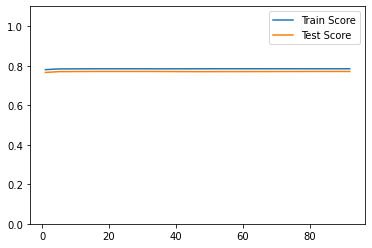

In [84]:
X_rscv_results = X_rscv_results.sort_values(by = 'param_n_estimators' )
plt.plot(X_rscv_results.param_n_estimators,X_rscv_results.mean_train_score,label='Train Score')
plt.plot(X_rscv_results.param_n_estimators,X_rscv_results.mean_test_score, label='Test Score')
plt.legend()
plt.ylim(0,1.1)
plt.show()

In [85]:
# from the above we can see that 10 estimators is optimum
params = {'n_estimators':list(range(1,10))}
ft = RandomForestClassifier()
gs_ft = GridSearchCV(estimator=ft,param_grid=params,cv=5, scoring='f1',return_train_score=True)
gs_ft.fit(X,y)
X_cv_results = pd.DataFrame(gs_ft.cv_results_)

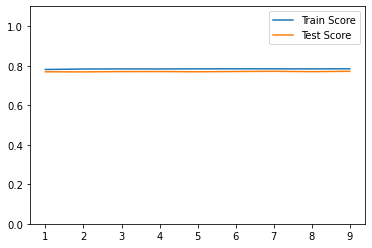

In [86]:
X_cv_results = X_cv_results.sort_values(by = 'param_n_estimators' )
plt.plot(X_cv_results.param_n_estimators,X_cv_results.mean_train_score,label='Train Score')
plt.plot(X_cv_results.param_n_estimators,X_cv_results.mean_test_score, label='Test Score')
plt.legend()
plt.ylim(0,1.1)
plt.show()

In [87]:
X_rscv_results.sort_values(by='mean_test_score', ascending=False)[['param_n_estimators','mean_test_score']].head()

,param_n_estimators,mean_test_score
3,17,0.770790
0,26,0.770745
6,83,0.770740
1,90,0.770659
2,33,0.770621


In [88]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [89]:
# Split data
train_data, test_data, train_labels, test_labels = train_test_split(
    df_undersampled.drop('class', axis=1), df_undersampled['class'], test_size=0.25)

In [90]:
# Design and train neural network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[['accuracy']])
model.fit(train_data, train_labels, epochs=10, batch_size=32)

Epoch 1/10
621/621 [==============================] - 1s 1ms/step - loss: 0.4408 - accuracy: 0.7952
Epoch 2/10
621/621 [==============================] - 1s 1ms/step - loss: 0.4163 - accuracy: 0.8064
Epoch 3/10
621/621 [==============================] - 1s 1ms/step - loss: 0.4130 - accuracy: 0.8081
Epoch 4/10
621/621 [==============================] - 1s 1ms/step - loss: 0.4116 - accuracy: 0.8093
Epoch 5/10
621/621 [==============================] - 1s 1ms/step - loss: 0.4105 - accuracy: 0.8101
Epoch 6/10
621/621 [==============================] - 1s 1ms/step - loss: 0.4101 - accuracy: 0.8102
Epoch 7/10
621/621 [==============================] - 1s 1ms/step - loss: 0.4091 - accuracy: 0.8099
Epoch 8/10
621/621 [==============================] - 1s 2ms/step - loss: 0.4083 - accuracy: 0.8095
Epoch 9/10
621/621 [==============================] - 1s 1ms/step - loss: 0.4083 - accuracy: 0.8103
Epoch 10/10
621/621 [==============================] - 1s 1ms/step - loss: 0.4076 - accuracy: 0.8098

In [91]:
# Evaluate model
loss, accuracy = model.evaluate(test_data, test_labels)

207/207 [==============================] - 0s 959us/step - loss: 0.4135 - accuracy: 0.8095


In [92]:
# Test model
predictions = model.predict(test_data)

207/207 [==============================] - 0s 1ms/step


In [93]:
predictions

array([[0.17942318],
       [0.2609318 ],
       [0.9981986 ],
       ...,
       [0.99929106],
       [0.23555686],
       [0.9993713 ]], dtype=float32)

## Customer Segmentation

In [94]:
cust_segment = pd_data_dum_drop[['purchase_value', 'singup_purchase_time_difference_dummy', 
                                        'singup_purchase_date_difference_dummy', 
                                        'source_Direct', 'source_SEO','browser_FireFox', 'browser_IE',
                                        'browser_Opera', 'browser_Safari', 'sex_M', 'category_cosmetics', 
                                        'category_electronics', 'category_health_care','category_home_essentials', 
                                        'age_category_Below 30','age_category_Between 31 & 35', 
                                        'age_category_Between 36 & 40', 'age_category_Between 41 & 50',
                                        'age_category_Above 50']]
cust_segment.head(2)

,purchase_value,singup_purchase_time_difference_dummy,singup_purchase_date_difference_dummy,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M,category_cosmetics,category_electronics,category_health_care,category_home_essentials,age_category_Below 30,age_category_Between 31 & 35,age_category_Between 36 & 40,age_category_Between 41 & 50,age_category_Above 50
0,0.517819,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,1.608423,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


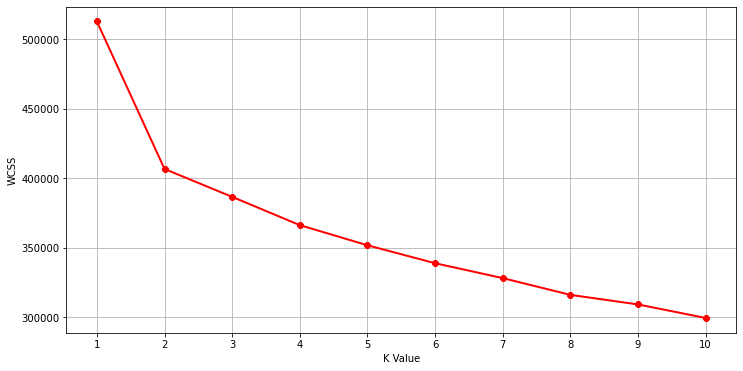

In [95]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(cust_segment.iloc[:,:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [101]:
# Fit KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(cust_segment)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [102]:
# Get predicted cluster labels
labels = kmeans.predict(cust_segment)

In [103]:
# Add predicted labels to DataFrame
cust_segment['Cluster'] = labels

In [104]:
# View cluster assignments
print(cust_segment['Cluster'].value_counts())

1    63873
2    49056
0    28475
Name: Cluster, dtype: int64
